# Import Modules 

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import math
import random

# Read in CSVs, combine data, and create additional columns

In [167]:
# Read in csvs
with open('2014-improved-property-sales.csv') as f:
    s2014 = pd.read_csv(f)
    
with open('2015-improved-property-sales.csv') as f:
    s2015 = pd.read_csv(f)
    
with open('2016-improved-property-sales.csv') as f:
    s2016 = pd.read_csv(f)
    
with open('2017-improved-property-sales.csv') as f:
    s2017 = pd.read_csv(f)

#standardize column names
s2014.columns = s2015.columns
s2016.columns = s2015.columns
s2017.columns = s2015.columns

# combine datasets into 1
datasets = [s2014, s2015, s2016, s2017]
data = pd.concat(datasets, ignore_index=True)
data

# create date difference column
def stringToDate(series):
    l = list()
    for s in series:
        ints = s.split('-')
        for i in range(len(ints)):
            ints[i] = int(ints[i])
        l.append(datetime(ints[0], ints[1], ints[2]))
    return l

data['Acquired'] = stringToDate(data['Acquired'])
data['Closed'] = stringToDate(data['Closed'])

data['Days Owned'] = data['Closed'] - data['Acquired']

def daysOwned(series):
    l = list()
    for s in series:
        l.append(s.days)
    return l

data['Days Owned'] = daysOwned(data['Days Owned'])

# create season column
def season(series):
    l = list()
    for s in series:
        m = s.month
        if m in (12, 1, 2):
            season = 'Winter'
        elif m in (3, 4, 5):
            season = 'Spring'
        elif m in (6, 7, 8):
            season = 'Summer'
        elif m in (9, 10, 11):
            season = 'Fall'
        l.append(season)
    return l

data['Season'] = season(data['Closed'])

# create year column
def yearClosed(series):
    l = list()
    for s in series:
        l.append(s.year)
    return l

data['Year Closed'] = yearClosed(data['Closed'])

#quantify property type
residential_l = ('Duplex', 'Duplex & Single Family', 'Duplex & Single Family - 2', 'Duplex - 2', 'Multi-Family', 
                 'Multi-Family & Duplex', 'Rooming House', 'Single Family', 'Single Family - 2', 'Single Family - 4')

def residential(series):
    l = list()
    for s in series:
        if s in residential_l:
            l.append(1)
        else:
            l.append(0)
    return l

data['Residential'] = residential(data['Property Type'])

# Seasons
data['Winter'] = data['Season'] == 'Winter'
data['Summer'] = data['Season'] == 'Summer'
data['Spring'] = data['Season'] == 'Spring'
data['Fall'] = data['Season'] == 'Fall'
data

,Key No.,Property Type,Acquired,Total Mgt. Expenses,Closed,Sale Price,Days Owned,Season,Year Closed,Residential,Winter,Summer,Spring,Fall
0,340332000,Condominium,2010-07-26,12632.70,2014-12-19,4586,1607,Winter,2014,0,True,False,False,False
1,340543000,Condominium,2013-12-02,3833.69,2014-08-08,1000,249,Summer,2014,0,False,True,False,False
2,340622000,Condominium,2013-12-02,2436.94,2014-05-14,1120,163,Spring,2014,0,False,False,True,False
3,340706000,Condominium,2013-10-14,1658.99,2014-05-14,1120,212,Spring,2014,0,False,False,True,False
4,340820000,Condominium,2012-10-08,6869.52,2014-01-21,7129,470,Winter,2014,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,5070892000,Duplex,2016-09-08,899.21,2017-05-09,72500,243,Spring,2017,1,False,False,True,False
1893,5380479000,Single Family,2016-07-11,937.74,2017-03-09,23300,241,Spring,2017,1,False,False,True,False
1894,5810622000,Restaurant,2016-01-04,9152.09,2017-06-30,38500,543,Summer,2017,0,False,True,False,False
1895,5821208000,Single Family,2016-07-11,7086.11,2017-03-09,85500,241,Spring,2017,1,False,False,True,False


# Graph Settings

In [6]:
plt.rcParams.update({'font.size':12})

# Graph 1

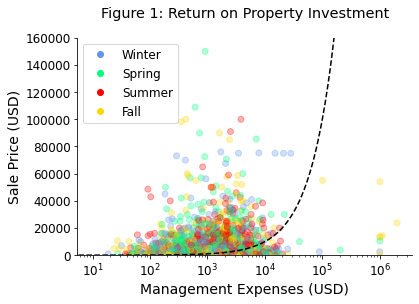

In [7]:
datag1 = data.copy()
datag1 = datag1.drop([742])
datag1 = datag1.drop([901])

ax = plt.subplot()

colors = {'Winter': 'cornflowerblue', 'Spring': 'springgreen', 'Summer':'red', 'Fall':'gold'}

# Scatter data
ax.scatter(x=datag1['Total Mgt. Expenses'], y=datag1['Sale Price'], color=datag1['Season'].map(colors), alpha=0.3)
#ax.set_xlim(0, 2.002457e+06)
ax.set_ylim(0, 160000)
ax.set_xscale('log')

# Plot logarithmic x = y line 
x = np.arange(0, 500000, 10)
ax.plot(x, x, color='k', linestyle='dashed')

# Format
ax.set_title("Figure 1: Return on Property Investment", pad=20)
ax.set_xlabel('Management Expenses (USD)', fontsize=14)
ax.set_ylabel('Sale Price (USD)', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# https://stackoverflow.com/questions/31303912/matplotlib-pyplot-scatterplot-legend-from-color-dictionary
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1, loc='upper left')

# Graph 2

In [77]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
data1 = data.copy().iloc[:1800]

In [87]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(4)),
])

pca1 = PCA(4)
pipe.fit(data1[['Year Closed', 'Sale Price', 'Days Owned', 'Total Mgt. Expenses']])
pipe.named_steps['pca'].explained_variance_ratio_

array([0.25920011, 0.25077973, 0.24885338, 0.24116678])

In [109]:
pca1 = PCA(4)
pca1.fit(data1[['Year Closed', 'Sale Price', 'Days Owned', 'Total Mgt. Expenses']])
d = dict()
for i in range(len(pca1.explained_variance_ratio_)):
    d[i+1] = pca1.explained_variance_ratio_[i]

d[1] = d[1] + d[2] + d[3] + d[4]
d[2] = d[2] + d[3] + d[4]
d[3] = d[3] + d[4]
d

{1: 1.0,
 2: 1.9472571763143382e-14,
 3: 9.03836620243935e-18,
 4: 1.9723202713358617e-23}

In [108]:
evr = pipe.named_steps['pca'].explained_variance_ratio_
d2 = dict()
for i in range(len(evr)):
    d2[i+1] = evr[i]
    
d2[1] = d2[1] + d2[2] + d2[3] + d2[4]
d2[2] = d2[2] + d2[3] + d2[4]
d2[3] = d2[3] + d2[4]
d2

{1: 1.0, 2: 0.740799889686746, 3: 0.490020159672311, 4: 0.2411667798330766}

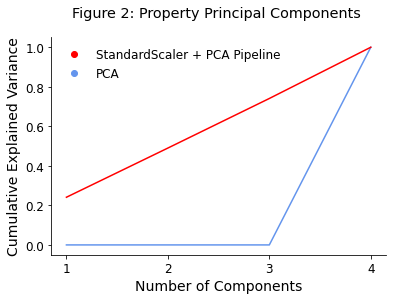

In [111]:
ax = plt.subplot()

# Scatter data
ax.plot(list(d.keys()), sorted(list(d.values()),reverse=False), color='cornflowerblue')
ax.plot(list(d2.keys()), sorted(list(d2.values()),reverse=False), color='red')

# Format
ax.set_title("Figure 2: Property Principal Components ", pad=20)
ax.set_xlabel('Number of Components', fontsize=14)
ax.set_ylabel('Cumulative Explained Variance', fontsize=14)
ax.set_xticks([1,2,3,4])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

colors = {'StandardScaler + PCA Pipeline': 'red', 'PCA': 'cornflowerblue'}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1, loc='upper left', frameon=False)

# Graph 3

In [198]:
data3 = data.copy()
data3 = data3.dropna(how='any')
data3

,Key No.,Property Type,Acquired,Total Mgt. Expenses,Closed,Sale Price,Days Owned,Season,Year Closed,Residential,Winter,Summer,Spring,Fall
0,340332000,Condominium,2010-07-26,12632.70,2014-12-19,4586,1607,Winter,2014,0,True,False,False,False
1,340543000,Condominium,2013-12-02,3833.69,2014-08-08,1000,249,Summer,2014,0,False,True,False,False
2,340622000,Condominium,2013-12-02,2436.94,2014-05-14,1120,163,Spring,2014,0,False,False,True,False
3,340706000,Condominium,2013-10-14,1658.99,2014-05-14,1120,212,Spring,2014,0,False,False,True,False
4,340820000,Condominium,2012-10-08,6869.52,2014-01-21,7129,470,Winter,2014,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,5070892000,Duplex,2016-09-08,899.21,2017-05-09,72500,243,Spring,2017,1,False,False,True,False
1893,5380479000,Single Family,2016-07-11,937.74,2017-03-09,23300,241,Spring,2017,1,False,False,True,False
1894,5810622000,Restaurant,2016-01-04,9152.09,2017-06-30,38500,543,Summer,2017,0,False,True,False,False
1895,5821208000,Single Family,2016-07-11,7086.11,2017-03-09,85500,241,Spring,2017,1,False,False,True,False


In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lr = LinearRegression()
lr

LinearRegression()

In [147]:
lr.fit(data3[['Total Mgt. Expenses']], data3['Sale Price'])
slope = lr.coef_[0]
intercept = lr.intercept_
slope, intercept

(-6.861545293748017e-10, 9486.558604118312)

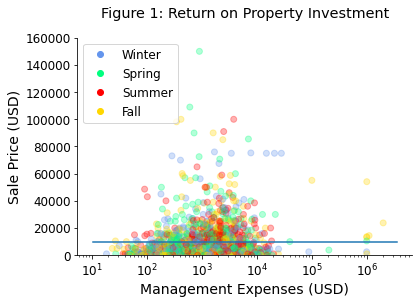

In [143]:
#option 1 regression line over scatter plot

datag1 = data.copy()
datag1 = datag1.drop([742])
datag1 = datag1.drop([901])

ax = plt.subplot()

colors = {'Winter': 'cornflowerblue', 'Spring': 'springgreen', 'Summer':'red', 'Fall':'gold'}

# Scatter data
ax.scatter(x=datag1['Total Mgt. Expenses'], y=datag1['Sale Price'], color=datag1['Season'].map(colors), alpha=0.3)
#ax.set_xlim(0, 2.002457e+06)
ax.set_ylim(0, 160000)
ax.set_xscale('log')

# Plot regression line 
x0 = ax.get_xlim()[0]
x1 = ax.get_xlim()[1]
y0 = slope * x0 + intercept
y1 = slope * x1 + intercept
ax.plot((x0, x1), (y0, y1))

# Format
ax.set_title("Figure 1: Return on Property Investment", pad=20)
ax.set_xlabel('Management Expenses (USD)', fontsize=14)
ax.set_ylabel('Sale Price (USD)', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# https://stackoverflow.com/questions/31303912/matplotlib-pyplot-scatterplot-legend-from-color-dictionary
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1, loc='upper left')

In [202]:

lr = LinearRegression()
lr.fit(data3[['Total Mgt. Expenses', 'Days Owned', 'Residential', 'Winter', 'Summer', 'Spring', 'Fall']], data3['Sale Price'])

lr.coef_/sum(lr.coef_)

array([ 2.31441721e-14,  7.27477656e-05,  9.99927252e-01,  1.78220654e-02,
        7.51390268e-02, -1.49137905e-01,  5.61768125e-02])

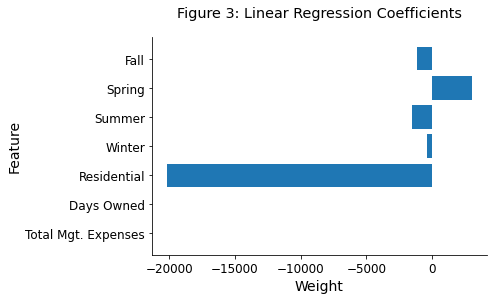

In [204]:
# coefficients
names = ['Total Mgt. Expenses', 'Days Owned', 'Residential', 'Winter', 'Summer', 'Spring', 'Fall']
vals = list(lr.coef_)

ax = plt.subplot()

# bar
ax.barh(names, vals)

# Format
ax.set_title("Figure 3: Linear Regression Coefficients", pad=20)
ax.set_xlabel('Weight', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Train/Test model

In [256]:
from sklearn.model_selection import train_test_split

In [300]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LinearRegression()),
])

In [308]:
train, test = train_test_split(data3, train_size=0.75) # training data is half of the data
train.head()
pipe.fit(train[['Total Mgt. Expenses', 'Days Owned', 'Residential', 'Winter', 'Summer', 'Spring', 'Fall']], train['Sale Price'])

pipe.score(test[['Total Mgt. Expenses', 'Days Owned', 'Residential', 'Winter', 'Summer', 'Spring', 'Fall']], test['Sale Price'])

-135481648885.14038